# Q1)


(360, 360)
Found 43 local maxima


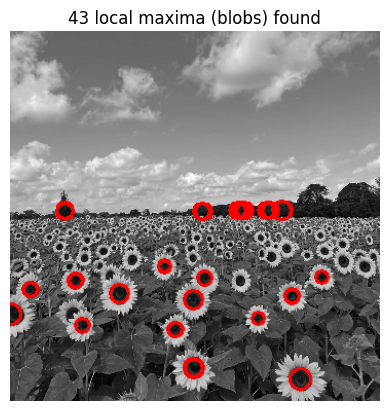

In [64]:
#working version with fixed kernal size 

import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, generate_binary_structure


def LoG_kernel(sigma):
    
    size = int(6 * 5 + 1)
    if size % 2 == 0:
     size += 1

    x = np.arange(-(size//2), size//2 + 1, 1)
    y = np.arange(-(size//2), size//2 + 1, 1)
    X, Y = np.meshgrid(x, y)
    # LoG formula
    norm = (X**2 + Y**2) / (2 * sigma**2)
    LoG = -1 / (np.pi * sigma**4) * (1 - norm) * np.exp(-norm)

    # Normalize kernel so sum of absolute values = 1
    LoG /= np.sum(np.abs(LoG))
    return LoG

def compute_scale_space(im, sigmas):
    scale_space = []
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        k = LoG_kernel(sigma)
        #plt.figure()
        #plt.imshow(k)
        response = cv.filter2D(im, -1, k, borderType=cv.BORDER_REFLECT)
        response = (sigma**2) * np.abs(response)
        scale_space.append(response)
    return scale_space  


def generate_sigmas(sigma_min, sigma_max, n_sigmas):
    return np.geomspace(sigma_min, sigma_max, n_sigmas)


n_sigmas = 40
sigma_min = 2
sigma_max = 20

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
#im = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)
im = cv.resize(im, (im.shape[1]//4, im.shape[0]//4))
print(im.shape)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off') 
sigmas = generate_sigmas(sigma_min, sigma_max, n_sigmas)
scale_space = compute_scale_space(im, sigmas)




scale_space_arr = np.stack(scale_space, axis=-1)

# Define 3D neighborhood connectivity (26 neighbors in 3D)
neighborhood = generate_binary_structure(3, 3)
# Compute local maxima across space and scale
local_max = (scale_space_arr == maximum_filter(scale_space_arr, size=(10,10,10)))

# Optional threshold to remove weak responses
threshold = 0.5 * np.max(scale_space_arr)   # keep only strong maxima
local_max = np.logical_and(local_max, scale_space_arr >= threshold)

# Get coordinates of all local maxima (y, x, scale index)
maxima_coords = np.argwhere(local_max)

print(f"Found {len(maxima_coords)} local maxima")

# Convert to (x, y, sigma)
blobs = []
for y, x, s in maxima_coords:
    blobs.append((x, y, sigmas[s]))



im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

for x, y, sigma in blobs:
    radius = np.sqrt(2) * sigma
    cv.circle(im_color, (x, y), int(radius), (255, 0, 0), 2)

plt.imshow(im_color)
plt.title(f"{len(blobs)} local maxima (blobs) found")
plt.axis('off')
plt.show()


Found 27026 local maxima
[(0, 0, 16), (1, 0, 16), (2, 0, 16), (3, 0, 16), (4, 0, 16), (5, 0, 16), (6, 0, 16), (7, 0, 16), (8, 0, 16), (9, 0, 16), (10, 0, 16), (11, 0, 16), (12, 0, 16), (13, 0, 16), (14, 0, 16), (15, 0, 16), (16, 0, 16), (17, 0, 16), (18, 0, 16), (19, 0, 16), (20, 0, 16), (21, 0, 16), (22, 0, 16), (23, 0, 16), (24, 0, 16), (26, 0, 16), (27, 0, 16), (28, 0, 16), (29, 0, 16), (30, 0, 16), (31, 0, 16), (32, 0, 16), (33, 0, 16), (0, 1, 16), (1, 1, 16), (2, 1, 16), (3, 1, 16), (4, 1, 16), (5, 1, 16), (6, 1, 16), (7, 1, 16), (8, 1, 16), (9, 1, 16), (10, 1, 16), (11, 1, 16), (12, 1, 16), (13, 1, 16), (14, 1, 16), (15, 1, 16), (16, 1, 16), (17, 1, 16), (18, 1, 16), (19, 1, 16), (20, 1, 16), (21, 1, 16), (22, 1, 16), (23, 1, 16), (26, 1, 16), (27, 1, 16), (28, 1, 16), (29, 1, 16), (30, 1, 16), (31, 1, 16), (32, 1, 16), (33, 1, 16), (0, 2, 16), (1, 2, 16), (2, 2, 16), (3, 2, 16), (4, 2, 16), (5, 2, 16), (6, 2, 16), (7, 2, 16), (8, 2, 16), (9, 2, 16), (10, 2, 16), (11, 2, 16), (12

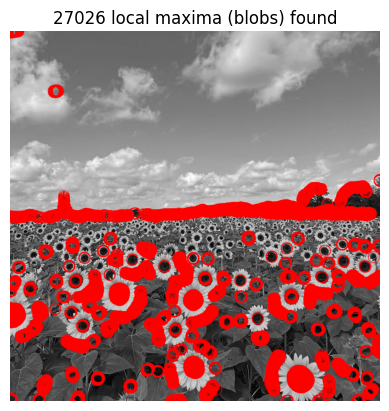

In [ ]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, generate_binary_structure


def LoG_kernel(sigma):
    
    size = int(sigma*6 )
    if size % 2 == 0:
        size += 1  # make sure size is odd

    # Create coordinate grid
    x = np.arange(-(size//2), size//2 + 1, 1)
    y = np.arange(-(size//2), size//2 + 1, 1)
    X, Y = np.meshgrid(x, y)

    # LoG formula
    norm = (X**2 + Y**2) / (2 * sigma**2)
    LoG = -1 / (np.pi * sigma**4) * (1 - norm) * np.exp(-norm)

    # Normalize kernel so sum of absolute values = 1
    LoG /= np.sum(np.abs(LoG))

    return LoG


def generate_sigmas(sigma_min, n_sigmas):
    sigmas = []
    for i in range(1, n_sigmas+1):
        sigmas.append(i*sigma_min)
    return sigmas


def compute_scale_space(im, sigmas):
    scale_space = []
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        k = LoG_kernel(sigma)
        #plt.figure(figsize=(4,4))
        #plt.imshow(k)
        #plt.figure()
        #plt.imshow(k)
        response = cv.filter2D(im, -1, k)
        response = (sigma**2) * response
        
        scale_space.append(response)
    return scale_space  

n_sigmas = 8
sigma_min = 2 #int(im.shape[0])//720

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
#im = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off') 
sigmas = generate_sigmas(sigma_min, n_sigmas)
scale_space = compute_scale_space(im, sigmas)




scale_space_arr = np.stack(scale_space, axis=-1)

# Define 3D neighborhood connectivity (26 neighbors in 3D)
neighborhood = generate_binary_structure(3, 3)
# Compute local maxima across space and scale
local_max = (scale_space_arr == maximum_filter(scale_space_arr, size=(3,3,1)))

# Optional threshold to remove weak responses
threshold = 0.2 * np.max(scale_space_arr)   # keep only strong maxima
local_max = np.logical_and(local_max, scale_space_arr >= threshold)

# Get coordinates of all local maxima (y, x, scale index)
maxima_coords = np.argwhere(local_max)

print(f"Found {len(maxima_coords)} local maxima")

# Convert to (x, y, sigma)
blobs = []
for y, x, s in maxima_coords:
    blobs.append((x, y, sigmas[s]))


print(blobs)
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

#clean
for x, y, s in blobs:
    cv.circle(im_color, (x, y), int(np.sqrt(2) * s), (255, 0, 0), 1)


plt.imshow(im_color)
plt.title(f"{len(blobs)} local maxima (blobs) found")
plt.axis('off')
plt.show()

Found 4420 blobs
[(0, 1100, 40), (1128, 1350, 30), (1129, 1350, 30), (1130, 1350, 30), (1131, 1350, 30), (1127, 1351, 30), (1128, 1351, 30), (1129, 1351, 30), (1130, 1351, 30), (1131, 1351, 30), (1132, 1351, 30), (1133, 1351, 30), (1126, 1352, 30), (1127, 1352, 30), (1128, 1352, 30), (1129, 1352, 30), (1130, 1352, 30), (1131, 1352, 30), (1132, 1352, 30), (1133, 1352, 30), (1126, 1353, 30), (1127, 1353, 30), (1128, 1353, 30), (1129, 1353, 30), (1130, 1353, 30), (1131, 1353, 30), (1132, 1353, 30), (1133, 1353, 30), (1134, 1353, 30), (1126, 1354, 30), (1127, 1354, 30), (1128, 1354, 30), (1129, 1354, 30), (1130, 1354, 30), (1131, 1354, 30), (1132, 1354, 30), (1133, 1354, 30), (1134, 1354, 30), (1127, 1355, 30), (1128, 1355, 30), (1129, 1355, 30), (1130, 1355, 30), (1131, 1355, 30), (1132, 1355, 30), (1133, 1355, 30), (1134, 1355, 30), (1127, 1356, 30), (1128, 1356, 30), (1129, 1356, 30), (1130, 1356, 30), (1131, 1356, 30), (1132, 1356, 30), (1133, 1356, 30), (1134, 1356, 30), (1128, 1357, 

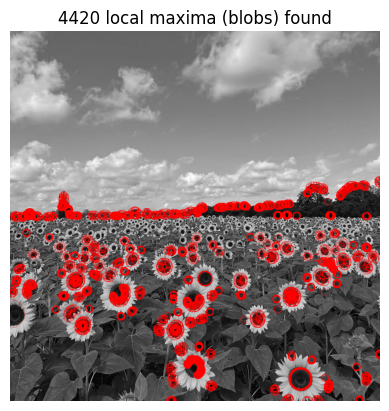

In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, generate_binary_structure


def LoG_kernel(sigma):
    
    size = int(sigma*6 )
    if size % 2 == 0:
        size += 1  # make sure size is odd

    # Create coordinate grid
    x = np.arange(-(size//2), size//2 + 1, 1)
    y = np.arange(-(size//2), size//2 + 1, 1)
    X, Y = np.meshgrid(x, y)

    # LoG formula
    norm = (X**2 + Y**2) / (2 * sigma**2)
    LoG = -1 / (np.pi * sigma**4) * (1 - norm) * np.exp(-norm)

    # Normalize kernel so sum of absolute values = 1
    LoG /= np.sum(np.abs(LoG))

    return LoG


def generate_sigmas(sigma_min, n_sigmas):
    sigmas = []
    for i in range(1, n_sigmas+1):
        sigmas.append(i*sigma_min)
    return sigmas


def compute_scale_space(im, sigmas):
    scale_space = []
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        k = LoG_kernel(sigma)
        #plt.figure(figsize=(4,4))
        #plt.imshow(k)
        #plt.figure()
        #plt.imshow(k)
        response = cv.filter2D(im, -1, k)
        response = (sigma**2) * response
        
        scale_space.append(response)
    return scale_space  

n_sigmas = 4
sigma_min = 10 #int(im.shape[0])//720

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
#im = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off') 
sigmas = generate_sigmas(sigma_min, n_sigmas)
scale_space = compute_scale_space(im, sigmas)


scale_space_arr = np.stack(scale_space, axis=-1)
# Parameters
window_size = 1000 # local maxima neighborhood
blobs = []

# Go through scales from largest sigma to smallest
window_size = 10
blobs = []

for s in reversed(range(len(sigmas))):
    plane = scale_space_arr[:, :, s]

    # Find local maxima in this 2D plane
    local_max = (plane == maximum_filter(plane, size=window_size))
    local_max = np.logical_and(local_max, plane >= 0.9999 * np.max(plane))  

    coords = np.argwhere(local_max)

    for y, x in coords:
        if scale_space_arr[y, x, s] == 0:   # already suppressed
            continue

        # Save blob (x, y, sigma)
        blobs.append((x, y, sigmas[s]))

        # Compute radius ~ sqrt(2)*sigma
        r = int(np.ceil(np.sqrt(2) * sigmas[s]))

        # Create circular mask
        yy, xx = np.ogrid[:scale_space_arr.shape[0], :scale_space_arr.shape[1]]
        mask = (xx - x)**2 + (yy - y)**2 <= r**2

        # Suppress this circle area in all smaller scales
        scale_space_arr[mask, :s] = 0



print(f"Found {len(blobs)} blobs")
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)


print(blobs)
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

#clean
for x, y, s in blobs:
    cv.circle(im_color, (x, y), int(np.sqrt(2) * s), (255, 0, 0), 1)


plt.imshow(im_color)
plt.title(f"{len(blobs)} local maxima (blobs) found")
plt.axis('off')
plt.show()

# Q2


In [ ]:
!pip install tikzplotlib

ERROR: Could not find a version that satisfies the requirement tikzplotlib2 (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tikzplotlib2


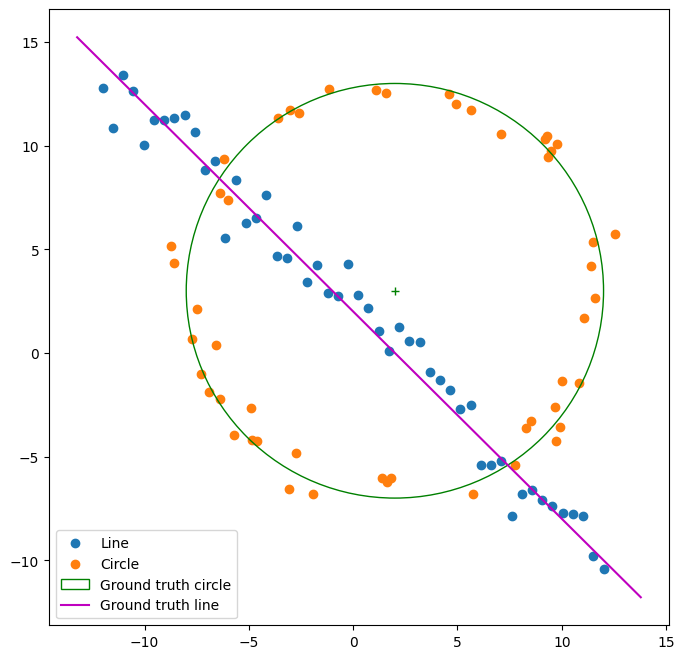

In [2]:
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(0)
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()


In [3]:
#print(X)
n = 2 
t= 1
k = 100 
p= 80

def get_abd():
    X1 = X[np.random.randint(0, X.shape[0])]
    X2 = X[np.random.randint(0, X.shape[0])]
    x1, y1 = X1
    x2, y2 = X2
    dx = x2 - x1
    dy = y2 - y1
    grad_line = dy/dx 
    normal_grad = -1/grad_line
    unit_v = np.array([1, normal_grad])
    unit_v = unit_v / np.linalg.norm(unit_v)
    d = unit_v[0]*x1 + unit_v[1]*y1
    return (unit_v[0], unit_v[1], d,X1,X2)



In [4]:
best_line = None
max_inliers = 0
best_x = None
best_inliers = None  # To store inlier points for the best line

for i in range(k):
    a, b, d, X1, X2 = get_abd()
    inliers_list = []  # Store inlier points for this iteration
    for x in X:
        dist = abs(a * x[0] + b * x[1] - d) / np.sqrt(a**2 + b**2)
        if dist < t:
            inliers_list.append(x)
    if len(inliers_list) > max_inliers:
        max_inliers = len(inliers_list)
        best_x = [X1, X2]
        best_line = [a, b, d]
        best_inliers = np.array(inliers_list)
    
        

print(f"Best line: {best_line}, with {max_inliers} inliers, best x: {best_x}")









Best line: [0.7111843238410096, 0.7030055885430825, 1.5935680323790669], with 46 inliers, best x: [array([-11.02040816,  13.41541193]), array([ 9.55102041, -7.39534371])]


C:\Users\User\AppData\Local\Temp\ipykernel_4560\2189756540.py:14: RuntimeWarning: invalid value encountered in scalar divide
  grad_line = dy/dx


In [5]:
import numpy as np
mask = np.ones(len(X), dtype=bool)
for p in best_inliers:
    # Check equality row-wise
    mask &= ~(np.all(X == p, axis=1))

remain_X = X[mask]

def are_collinear(p1, p2, p3, tol=1e-6):
    """
    Check if three points are collinear using the area of the triangle.
    Returns True if collinear.
    """
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    # Area formula for triangle
    area = 0.5 * abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))
    return area < tol

def circle_from_3_points(p1, p2, p3):
    """
    Compute circle center (x0, y0) and radius r from 3 non-collinear points.
    """
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    # Solve using linear system derived from perpendicular bisectors
    A = np.array([
        [2*(x2 - x1), 2*(y2 - y1)],
        [2*(x3 - x1), 2*(y3 - y1)]
    ])
    B = np.array([
        x2**2 + y2**2 - x1**2 - y1**2,
        x3**2 + y3**2 - x1**2 - y1**2
    ])
    
    # Solve for circle center
    x0, y0 = np.linalg.solve(A, B)
    
    # Compute radius
    r = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
    return x0, y0, r

In [6]:
best_circle = None
max_circle_inliers = []
best_circle_points = None  # to store the 3 points that defined the best circle

for _ in range(k):
    indices = np.random.choice(len(remain_X), 3, replace=False)
    p1, p2, p3 = remain_X[indices]
    
    if not are_collinear(p1, p2, p3):
        x0, y0, r = circle_from_3_points(p1, p2, p3)
        
        # Check inliers
        circle_inlier_list = []
        for p in remain_X:
            x, y = p
            dist = np.sqrt((x - x0)**2 + (y - y0)**2)
            error = abs(dist - r)
            if error < t:  # within tolerance
                circle_inlier_list.append(p)
        
        # If better than current best, update
        if len(circle_inlier_list) > len(max_circle_inliers):
            max_circle_inliers = circle_inlier_list
            best_circle = (x0, y0, r)
            best_circle_points = [p1, p2, p3]  # save defining points

if best_circle is not None:
    print(f"Best circle: Center=({best_circle[0]:.3f}, {best_circle[1]:.3f}), "
          f"Radius={best_circle[2]:.3f}, Inliers={len(max_circle_inliers)}")
    print(f"Best circle defined by points: {best_circle_points}")
else:
    print("No circle found.")


Best circle: Center=(1.881, 3.162), Radius=9.840, Inliers=45
Best circle defined by points: [array([-3.01687841, 11.69618183]), array([11.47695176,  5.34254319]), array([-4.60294838, -4.2399402 ])]


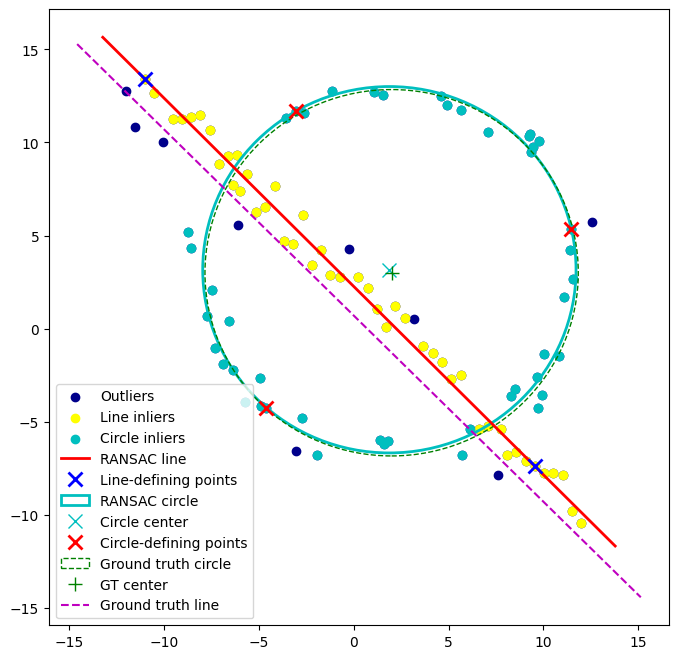

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot all points (outliers shown in light gray initially)
ax.scatter(X[:, 0], X[:, 1], color='darkblue', label='Outliers')

# Line inliers in yellow
if best_inliers is not None and len(best_inliers) > 0:
    ax.scatter(best_inliers[:, 0], best_inliers[:, 1],
               color='yellow', label='Line inliers')

# Circle inliers in cyan
if max_circle_inliers is not None and len(max_circle_inliers) > 0:
    max_circle_inliers = np.array(max_circle_inliers)
    ax.scatter(max_circle_inliers[:, 0], max_circle_inliers[:, 1],
               color='c', label='Circle inliers')

# Best RANSAC line
if best_line is not None:
    a, b, d = best_line
    x_min, x_max = ax.get_xlim()
    y_min, y_max = (d - a * x_min) / b, (d - a * x_max) / b
    ax.plot([x_min, x_max], [y_min, y_max],
            color='r', linewidth=2, label='RANSAC line')

# Line-defining points in blue crosses
for i, pt in enumerate(best_x):
    ax.plot(pt[0], pt[1], 'x', color='blue',
            markersize=10, markeredgewidth=2,
            label='Line-defining points' if i == 0 else "")

# Plot the best RANSAC circle
if best_circle is not None:
    x0, y0, r = best_circle
    ransac_circle = plt.Circle((x0, y0), r, color='c',
                               fill=False, linewidth=2,
                               label='RANSAC circle')
    ax.add_patch(ransac_circle)
    ax.plot(x0, y0, 'x', color='c', markersize=10, label='Circle center')

    # Mark the 3 points that defined the best circle
    if best_circle_points is not None:
        for i, pt in enumerate(best_circle_points):
            ax.plot(pt[0], pt[1], 'x', color='red', markersize=10,
                    markeredgewidth=2,
                    label='Circle-defining points' if i == 0 else "")


# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g',
                       fill=False, linestyle='--',
                       label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g', markersize=10, label='GT center')

# Ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', linestyle='--', label='Ground truth line')

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()


Selected points: [[694.8452  324.83334]
 [930.131   324.83334]
 [941.75    502.0238 ]
 [702.1071  500.57144]]


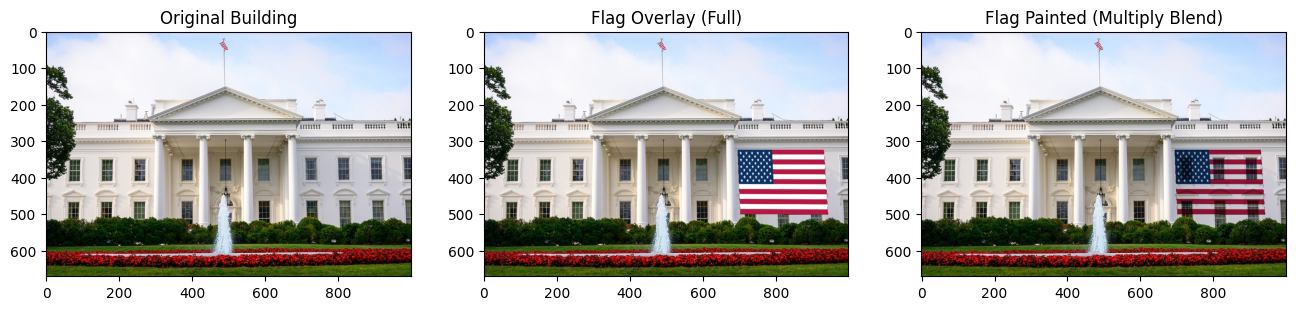

✅ Images saved as flag_on_building_full.jpg and flag_on_building_painted.jpg


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Enable interactive window for point selection
%matplotlib tk

# --- Step 1: Load your images ---
building_img = cv2.imread("america.jpg")
flag_img = cv2.imread("USA.png")

if building_img is None or flag_img is None:
    raise FileNotFoundError("⚠️ Could not load one or both images. Check file paths.")

# Convert BGR → RGB (for Matplotlib display)
building_rgb = cv2.cvtColor(building_img, cv2.COLOR_BGR2RGB)
flag_rgb = cv2.cvtColor(flag_img, cv2.COLOR_BGR2RGB)

# Optional: resize the flag
flag_rgb = cv2.resize(flag_rgb, (400, 250))
flag_img = cv2.resize(flag_img, (400, 250))

# --- Step 2: Select 4 points on the building image ---
plt.figure(figsize=(10, 6))
plt.imshow(building_rgb)
plt.title("Click 4 points on the surface (clockwise or counterclockwise)")
plt.axis("on")
points = plt.ginput(4)  # Wait for 4 mouse clicks
plt.close()

points = np.array(points, dtype=np.float32)
print("Selected points:", points)

# --- Step 3: Define corresponding points on the flag image ---
h_flag, w_flag = flag_img.shape[:2]
flag_corners = np.array([
    [0, 0],
    [w_flag - 1, 0],
    [w_flag - 1, h_flag - 1],
    [0, h_flag - 1]
], dtype=np.float32)

# --- Step 4: Compute Homography ---
H, _ = cv2.findHomography(flag_corners, points)

# --- Step 5: Warp the flag to match the building surface ---
warped_flag = cv2.warpPerspective(flag_img, H, (building_img.shape[1], building_img.shape[0]))

# --- Step 6: Create mask for the warped flag ---
flag_gray = cv2.cvtColor(flag_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(flag_gray, 1, 255, cv2.THRESH_BINARY)
warped_mask = cv2.warpPerspective(mask, H, (building_img.shape[1], building_img.shape[0]))
mask_bool = warped_mask.astype(bool)

# --- Step 7: Blend the images ---
# Convert to float
building_float = building_img.astype(np.float32) / 255.0
warped_flag_float = warped_flag.astype(np.float32) / 255.0

# Multiply effect inside mask
multiply_result = building_float.copy()
multiply_result[mask_bool] = building_float[mask_bool] * warped_flag_float[mask_bool]

# Simple overlay (just for comparison)
combined = building_img.copy()
combined[mask_bool] = warped_flag[mask_bool]

# Convert both results back to uint8
multiply_result = np.clip(multiply_result * 255, 0, 255).astype(np.uint8)
combined = np.clip(combined, 0, 255).astype(np.uint8)

# --- Step 8: Display all results ---
%matplotlib inline
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(building_img, cv2.COLOR_BGR2RGB))
plt.title("Original Building")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Flag Overlay (Full)")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(multiply_result, cv2.COLOR_BGR2RGB))
plt.title("Flag Painted (Multiply Blend)")

plt.show()

# --- Step 9: Save outputs ---
cv2.imwrite("flag_on_building_full.jpg", combined)
cv2.imwrite("flag_on_building_painted.jpg", multiply_result)
print("✅ Images saved as flag_on_building_full.jpg and flag_on_building_painted.jpg")


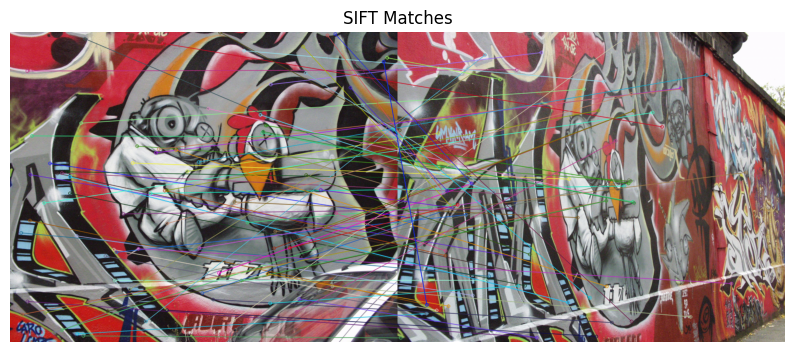

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare images
img1 = cv.imread('graf/img1.ppm')
img5 = cv.imread('graf/img5.ppm')
img1_gray, img5_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
img1_rgb, img5_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB), cv.cvtColor(img5, cv.COLOR_BGR2RGB)

# Initialize SIFT and BFMatcher
sift = cv.SIFT_create()
bf = cv.BFMatcher()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp5, des5 = sift.detectAndCompute(img5_gray, None)

# Match descriptors using KNN + ratio test
matches = bf.knnMatch(des1, des5, k=2)
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# Draw and show matches
matched_img = cv.drawMatches(img1_rgb, kp1, img5_rgb, kp5, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 6))
plt.imshow(matched_img)
plt.title('SIFT Matches')
plt.axis('off')
plt.show()


Computed Homography Matrix:
 [[ 9.69958103e-01  6.37606617e-02  2.10154285e+02]
 [ 5.22507845e-01  1.51558128e+00 -1.52863617e+02]
 [ 1.21633995e-03  5.39232015e-07  1.00000000e+00]]


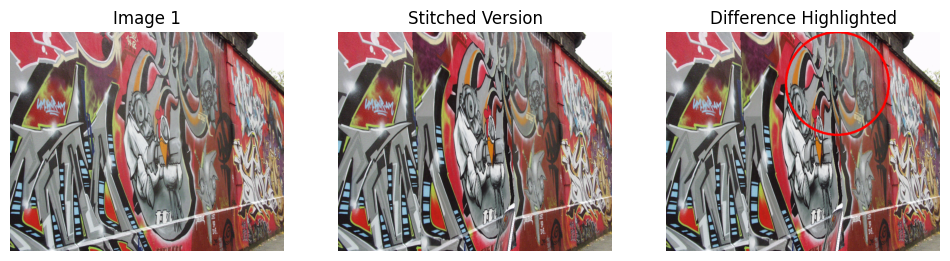

In [33]:
from scipy import linalg

def calDistance(p1, p2, H):
    p1_h = np.array([p1[0], p1[1], 1])
    p2_h = np.array([p2[0], p2[1], 1])
    est = np.dot(H, p1_h)
    est /= est[2]
    return np.linalg.norm(p2_h - est)

def RANSAC(pts1, pts2, threshold=40, iterations=100, min_inliers=10):
    best_H, max_inliers = None, 0
    pts = np.hstack((pts1, pts2))
    for _ in range(iterations):
        np.random.shuffle(pts)
        p1, p2 = pts[:4, :2], pts[:4, 2:]
        rem1, rem2 = pts[4:, :2], pts[4:, 2:]
        H = cv.findHomography(p1, p2)[0]
        if H is None:  # skip bad estimates
            continue
        inliers = [(rem1[i], rem2[i]) for i in range(len(rem1)) if calDistance(rem1[i], rem2[i], H) < threshold]
        if len(inliers) > max_inliers and len(inliers) >= min_inliers:
            best_H, max_inliers = H, len(inliers)
    return best_H

# Re-run SIFT for homography computation
sift = cv.SIFT_create(nOctaveLayers=3, contrastThreshold=0.08, edgeThreshold=12, sigma=0.9)
kp1, des1 = sift.detectAndCompute(img5, None)
kp2, des2 = sift.detectAndCompute(img1, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = [m for m, n in matches if m.distance < 0.75 * n.distance]

pts1 = np.array([kp1[m.queryIdx].pt for m in good])
pts2 = np.array([kp2[m.trainIdx].pt for m in good])

H = RANSAC(pts2, pts1)

if H is None:
    raise ValueError("RANSAC failed to compute a valid homography. Try increasing matches or iterations.")

H = np.array(H, dtype=np.float64)
print("Computed Homography Matrix:\n", H)

# Warp and blend
img_warped = cv.warpPerspective(img1, H, (img5.shape[1], img5.shape[0]))
_, mask = cv.threshold(cv.cvtColor(img_warped, cv.COLOR_BGR2GRAY), 10, 1, cv.THRESH_BINARY_INV)
img5_masked = np.multiply(mask[..., None], img5)
blended = cv.addWeighted(img5_masked, 1, img_warped, 1, 0)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB)), plt.title("Image 1"), plt.axis("off")
plt.subplot(132), plt.imshow(cv.cvtColor(blended, cv.COLOR_BGR2RGB)), plt.title("Stitched Version"), plt.axis("off")
highlight = cv.circle(blended.copy(), (500, 150), 150, (0, 0, 255), 5)
plt.subplot(133), plt.imshow(cv.cvtColor(highlight, cv.COLOR_BGR2RGB)), plt.title("Difference Highlighted"), plt.axis("off")
plt.show()
